In [367]:
import pandas as pd
import numpy as np

In [368]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [369]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [370]:
from sklearn.decomposition import PCA

In [371]:
from numpy import linalg as LA

In [372]:
pca = PCA(n_components=2)

In [373]:
data_set = pd.read_csv("cho.txt", sep = '\t', lineterminator = '\n',header = -1)

In [374]:
data_set.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.110,-0.04,0.190,0.82
1,2,1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.23,-0.325,0.00
2,3,1,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.12,-0.160,0.67
3,4,1,0.07,0.26,-0.47,-0.68,-0.63,-0.39,0.07,0.79,0.58,0.31,-0.14,-0.29,-0.103,-0.20,-0.060,0.36
4,5,1,-1.04,0.13,0.51,-0.44,-0.88,-0.32,0.21,0.95,1.07,0.38,0.01,-0.13,-0.780,-0.13,0.092,0.00


In [375]:
data_set_1 = data_set[data_set[1]!=-1]

In [376]:
from scipy import stats
data_set_1 = data_set_1[(abs(stats.zscore(data_set_1)) < 3).all(axis=1)]

In [377]:
ground_truth = data_set_1[1]

In [378]:
num_clusters = len(ground_truth.unique())

In [379]:
data_set_1 = data_set_1.loc[:,2:]

### Pre-processing data

In [380]:
scaler = MinMaxScaler()
print(scaler.fit(data_set_1))

data_set_1.head(3)

data_set_1 = pd.DataFrame(scaler.transform(data_set_1))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [381]:
projected = pca.fit_transform(data_set_1)

In [382]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA before clustering by HAC

<IPython.core.display.Javascript object>


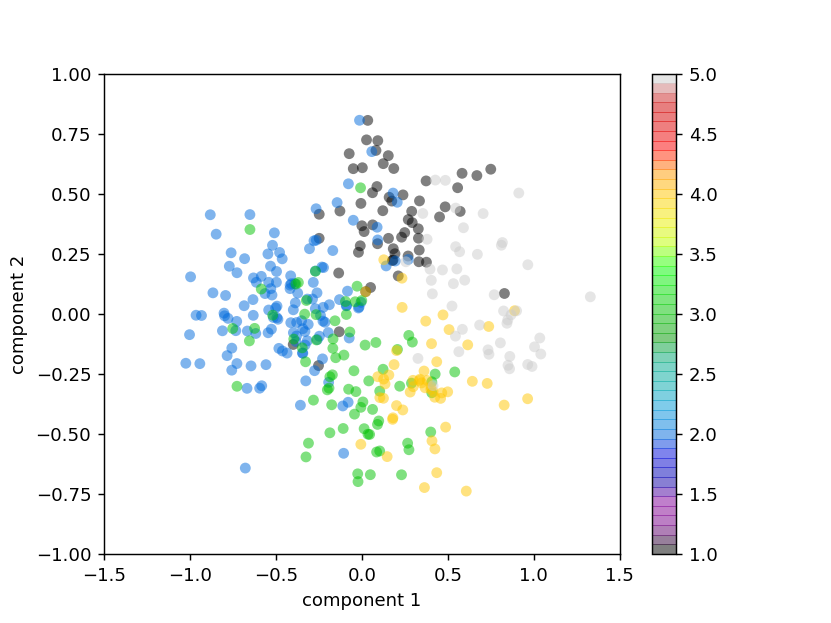

In [383]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=ground_truth, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.figure(1, figsize=(20, 5))
plt.axis([-1.5,1.5,-1,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [384]:
plt.show()

In [336]:
data_set_1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.402027,0.100254,0.062551,0.078995,0.009578,0.006570,0.028257,0.047003,0.049169,0.044053,0.057798
1,0.0,0.239865,0.090102,0.050366,0.050269,0.012943,0.007492,0.030612,0.043597,0.036545,0.032305,0.031193
2,0.0,0.195946,0.093909,0.038180,0.044883,0.014238,0.005763,0.022763,0.023161,0.029900,0.033774,0.048624


In [385]:
a = pd.DataFrame(data_set_1.loc[:1,:])

In [386]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.390533,0.330065,0.272727,0.349570,0.342593,0.517787,0.235849,0.166667,0.782738,0.794038,0.653333,0.797872,0.595506,0.502347,0.633898,0.772277
1,0.505917,0.460784,0.470455,0.395415,0.429012,0.355731,0.396226,0.213542,0.633929,0.658537,0.566667,0.526596,0.625843,0.464789,0.515254,0.722772


In [387]:
b = pd.DataFrame(data_set_1.loc[246:246,:])

In [388]:
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
246,0.452663,0.506536,0.613636,0.724928,0.820988,0.600791,0.58805,0.489583,0.377976,0.273713,0.393333,0.446809,0.578652,0.478873,0.596949,0.50165


In [389]:
LA.norm(a - b)

nan

In [390]:
print(b)

           0         1         2         3         4         5        6   \
246  0.452663  0.506536  0.613636  0.724928  0.820988  0.600791  0.58805   

           7         8         9         10        11        12        13  \
246  0.489583  0.377976  0.273713  0.393333  0.446809  0.578652  0.478873   

           14       15  
246  0.596949  0.50165  


In [391]:
from scipy.spatial import distance

In [392]:
import numpy as np

In [393]:
data_set_1.shape[0]

364

In [394]:
data_set_1 = data_set_1.dropna()

In [395]:
data_set_1.shape[0]

364

Distance Matrix calculation

In [396]:
def dist_matrix(data_points):
    matrix = np.zeros((len(data_points),len(data_points)))
    for i in range(len(data_points)):
        for j in range(len(data_points)):
            dst = distance.euclidean(data_points[i], data_points[j])
            matrix[i,j] = dst
    return matrix

In [397]:
def row_value(matrix):
    matrix1 = matrix[np.nonzero(matrix)]
    min_value = matrix1.min()
    print (min_value)
    row_count = 0
    for rows in matrix:
        row_values = [y for y in rows if y > 0]
        if(len(row_values) > 0):
            if min(row_values) == min_value:
                break
            row_count = row_count + 1
    for j in range(matrix.shape[1]):
        if matrix[row_count][j] == min_value:
            return row_count, j
    return row_count, -1

Cluster update

In [398]:
def update_default_clusters(default_clusters,row_count,col_count):
    minval = min(row_count,col_count)
    maxval = max(row_count,col_count)
    for i in range(len(default_clusters)):
        if default_clusters[i] == maxval:
            default_clusters[i] = minval
#    print(len(default_clusters),row_count,col_count)
    if(default_clusters[col_count] == maxval):
        default_clusters[col_count] = minval
    else:
        default_clusters[row_count] = minval
    return default_clusters

Jaccard coefficient calculation

In [399]:
def calc_jaccard(default_clusters):
    default_clusters_set = sorted(set(default_clusters))
   # print (len(default_clusters_set))
    clusters_map = {}
    for i in range(len(default_clusters_set)):
        clusters_map[default_clusters_set[i]] = i+1
    count = 1
    cluster_id = 1
    for i in range(len(default_clusters)):
        default_clusters[i] = clusters_map[default_clusters[i]]
    ground_truth_map = {}
    index = 0
    for i in ground_truth.index.values:
        ground_truth_map[index] = i
        index = index + 1
    return jaccard_coefficient(ground_truth,default_clusters,ground_truth_map)

HAC Algorithm

In [466]:
def perform_HAC(matrix):
    data_points = []
    default_clusters = []
    print(data_set_1.shape)
    for i in range(data_set_1.shape[0]):
        df = data_set_1.loc[i:i,:]
        data_points.append(df)
    default_clusters = [i for i in range(len(data_points))]
    matrix = dist_matrix(data_points)
    while matrix.shape[1] > num_clusters:
        row_count, col_count = row_value(matrix)
        a = data_points[row_count].values
        b = data_points[col_count].values
        c = np.minimum.reduce([a,b])
        min_value = min(row_count,col_count)
        max_value = max(row_count,col_count)
        data_points[min_value] = pd.DataFrame(c)
        default_clusters = update_default_clusters(default_clusters,min(,col_count)
        clusters_list[min_value] = clusters_list[min_value] + clusters_list[max_value]
        del clusters_list[max_value]
        del data_points[max_value]
        a = matrix[row_count]
        b = matrix[col_count]
        c = np.minimum.reduce([a,b])
        matrix[min_value] =  c
        matrix[:,min_value] =  c
        print("-------------ssssssssssss---------------")        
        print(matrix.shape)
        matrix = np.delete(matrix,[max_value],0)
        matrix = np.delete(matrix,[max_value],1)
        print(matrix.shape)    
        print("-------------ssssssssssss---------------")        
    jaccard_coefficient = calc_jaccard(default_clusters)
    print ("jaccard_coefficient")
    print (jaccard_coefficient)
    return default_clusters

In [467]:
matrix = np.zeros((data_set_1.shape[0],data_set_1.shape[0]))
matrix1 = matrix[np.nonzero(matrix)]

In [468]:
clusters_list = []
for i in range(data_set_1.shape[0]):
    list = []
    list.append(i)
    clusters_list.append(list)

In [469]:
def hac_min():
    return perform_HAC(matrix)

### Jaccard coefficient

#### Incidence Matrix

In [470]:
def incidence_matrix(ground_truth,default_clusters,ground_truth_map):
    incidence_matrix = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_p = np.zeros((len(default_clusters),len(default_clusters)))
    incidence_matrix_c = np.zeros((len(default_clusters),len(default_clusters)))
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if default_clusters[i] == default_clusters[j]:
                incidence_matrix_c[i][j] = 1
            else:
                incidence_matrix_c[i][j] = 0
            if ground_truth[ground_truth_map[i]] == ground_truth[ground_truth_map[j]]:
                incidence_matrix_p[i][j] = 1
            else:
                incidence_matrix_p[i][j] = 0
    return incidence_matrix_c,incidence_matrix_p

In [471]:
def jaccard_coefficient(ground_truth,default_clusters,ground_truth_map):
    index = 0
    M11 = 0
    M00 = 0
    M10 = 0
    M01 = 0
    incidence_matrix_c,incidence_matrix_p = incidence_matrix(ground_truth,default_clusters,ground_truth_map)
    for i in range(len(default_clusters)):
        for j in range(len(default_clusters)):
            if incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 1:
                M11 = M11 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 0:
                M00 = M00 + 1
            elif incidence_matrix_p[i][j] == 1 and incidence_matrix_c[i][j] == 0:
                M10 = M10 + 1
            elif incidence_matrix_p[i][j] == 0 and incidence_matrix_c[i][j] == 1:
                M01 = M01 + 1
            index = index + 1
#    print (M11,M10,M01)
    jaccard_coeff = M11 / (M11 + M10 + M01)
    return jaccard_coeff

In [472]:
new_clusters = []
new_clusters = hac_min()

(364, 16)
0.166433690588
-------------ssssssssssss---------------
(364, 364)
(363, 363)
-------------ssssssssssss---------------
0.183541169203
-------------ssssssssssss---------------
(363, 363)
(362, 362)
-------------ssssssssssss---------------
0.186799915974
-------------ssssssssssss---------------
(362, 362)
(361, 361)
-------------ssssssssssss---------------
0.2024805099
-------------ssssssssssss---------------
(361, 361)
(360, 360)
-------------ssssssssssss---------------
0.202715148089
-------------ssssssssssss---------------
(360, 360)
(359, 359)
-------------ssssssssssss---------------
0.204199994264
-------------ssssssssssss---------------
(359, 359)
(358, 358)
-------------ssssssssssss---------------
0.212938350294
-------------ssssssssssss---------------
(358, 358)
(357, 357)
-------------ssssssssssss---------------
0.219119994716
-------------ssssssssssss---------------
(357, 357)
(356, 356)
-------------ssssssssssss---------------
0.219437119001
-------------ssssssssssss

-------------ssssssssssss---------------
(281, 281)
(280, 280)
-------------ssssssssssss---------------
0.289923110056
-------------ssssssssssss---------------
(280, 280)
(279, 279)
-------------ssssssssssss---------------
0.290059622618
-------------ssssssssssss---------------
(279, 279)
(278, 278)
-------------ssssssssssss---------------
0.290297168555
-------------ssssssssssss---------------
(278, 278)
(277, 277)
-------------ssssssssssss---------------
0.29068649875
-------------ssssssssssss---------------
(277, 277)
(276, 276)
-------------ssssssssssss---------------
0.291303707049
-------------ssssssssssss---------------
(276, 276)
(275, 275)
-------------ssssssssssss---------------
0.291706802063
-------------ssssssssssss---------------
(275, 275)
(274, 274)
-------------ssssssssssss---------------
0.292276452858
-------------ssssssssssss---------------
(274, 274)
(273, 273)
-------------ssssssssssss---------------
0.292497402064
-------------ssssssssssss---------------
(273, 27

-------------ssssssssssss---------------
(172, 172)
(171, 171)
-------------ssssssssssss---------------
0.355369482457
-------------ssssssssssss---------------
(171, 171)
(170, 170)
-------------ssssssssssss---------------
0.355957095961
-------------ssssssssssss---------------
(170, 170)
(169, 169)
-------------ssssssssssss---------------
0.35601848867
-------------ssssssssssss---------------
(169, 169)
(168, 168)
-------------ssssssssssss---------------
0.356199687954
-------------ssssssssssss---------------
(168, 168)
(167, 167)
-------------ssssssssssss---------------
0.356587536812
-------------ssssssssssss---------------
(167, 167)
(166, 166)
-------------ssssssssssss---------------
0.357515555651
-------------ssssssssssss---------------
(166, 166)
(165, 165)
-------------ssssssssssss---------------
0.357769258646
-------------ssssssssssss---------------
(165, 165)
(164, 164)
-------------ssssssssssss---------------
0.357869209664
-------------ssssssssssss---------------
(164, 16

(19, 19)
-------------ssssssssssss---------------
0.54440347535
-------------ssssssssssss---------------
(19, 19)
(18, 18)
-------------ssssssssssss---------------
0.563843170556
-------------ssssssssssss---------------
(18, 18)
(17, 17)
-------------ssssssssssss---------------
0.567601901917
-------------ssssssssssss---------------
(17, 17)
(16, 16)
-------------ssssssssssss---------------
0.569563277843
-------------ssssssssssss---------------
(16, 16)
(15, 15)
-------------ssssssssssss---------------
0.570470007228
-------------ssssssssssss---------------
(15, 15)
(14, 14)
-------------ssssssssssss---------------
0.573511120628
-------------ssssssssssss---------------
(14, 14)
(13, 13)
-------------ssssssssssss---------------
0.587182520151
-------------ssssssssssss---------------
(13, 13)
(12, 12)
-------------ssssssssssss---------------
0.593211706353
-------------ssssssssssss---------------
(12, 12)
(11, 11)
-------------ssssssssssss---------------
0.593645809638
-------------sss

In [473]:
set(new_clusters)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [462]:
#clusters_list

In [463]:
new_clusters = pd.Series(new_clusters)

In [464]:
projected = pca.fit_transform(data_set_1)

In [465]:
pca.fit(data_set_1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Visualization of data points by PCA after clustering by HAC

<IPython.core.display.Javascript object>


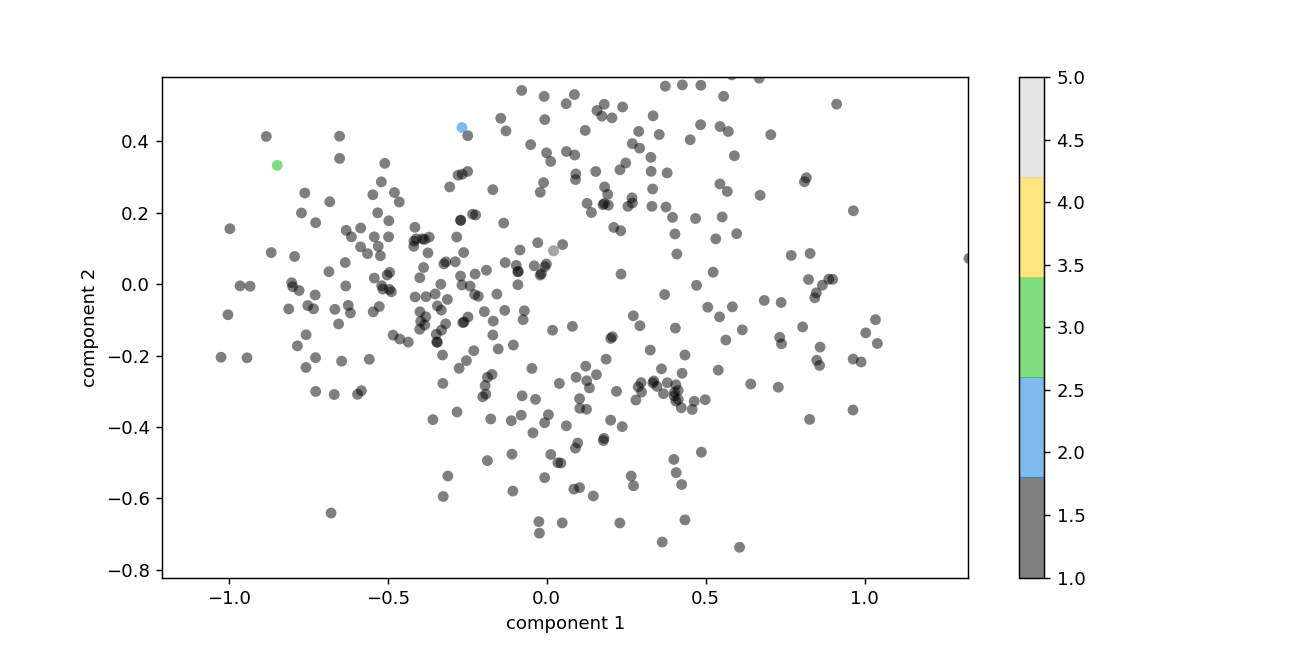

In [417]:
%matplotlib notebook
plt.figure(2, figsize=(10, 5))
plt.scatter(projected[:, 0], projected[:, 1],
            c=new_clusters, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.figure(2, figsize=(20, 5))
plt.axis([-2,2,-1,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [137]:
from sklearn.cluster import AgglomerativeClustering

In [138]:
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  

In [139]:
arr = cluster.fit_predict(data_set_1)

<IPython.core.display.Javascript object>


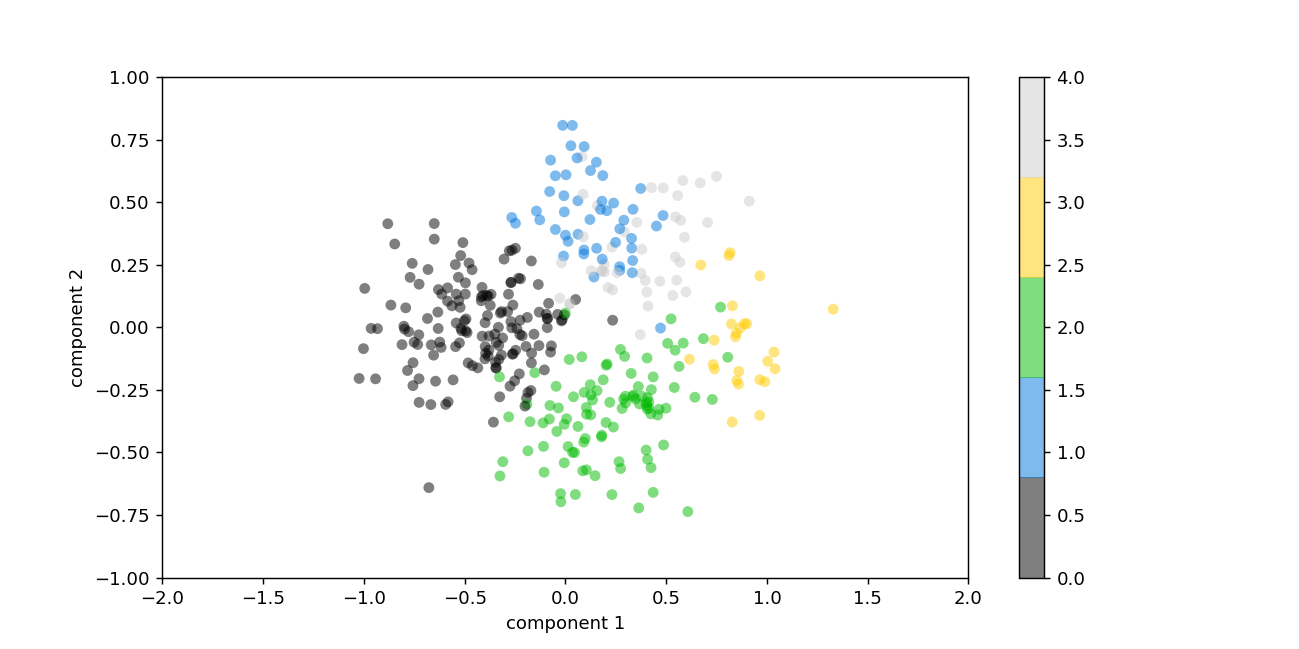

In [140]:
%matplotlib notebook
plt.figure(2, figsize=(10, 5))
plt.scatter(projected[:, 0], projected[:, 1],
            c=arr, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.figure(2, figsize=(20, 5))
plt.axis([-2,2,-1,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [141]:
arr

array([1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 1, 1, 0, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 4, 1, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 4,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 0, 3, 2, 4, 4, 2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2,

In [144]:
jaccard_coefficient = calc_jaccard(arr)
print ("jaccard_coefficient")
print (jaccard_coefficient)

TypeError: 'float' object is not callable

In [146]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ground_truth, arr)

0.23351648351648352

In [180]:
calc_jaccard(arr)

0.4280744404392657

TypeError: 'float' object is not callable